In [660]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [683]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [684]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [685]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,1.00,0.75,1.00,0.75,1.00,1.00,0.75,1.00,0.75,0.75
1,1.00,0.75,0.50,1.00,0.75,1.00,1.00,1.00,1.00,1.00
2,0.50,1.00,0.75,0.75,1.00,1.00,1.00,1.00,1.00,0.75
3,1.00,0.75,0.50,1.00,1.00,0.50,1.00,1.00,1.00,1.00
4,1.00,1.00,1.00,1.00,0.50,1.00,0.75,0.75,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...
45,0.75,1.00,1.00,1.00,0.75,1.00,1.00,1.00,0.50,0.50
46,1.00,1.00,1.00,0.50,0.50,0.75,1.00,0.50,0.75,0.50
47,1.00,0.50,1.00,0.50,0.75,1.00,1.00,1.00,1.00,1.00
48,0.75,1.00,1.00,1.00,1.00,0.50,1.00,1.00,0.75,0.75


In [686]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,27.287224,28.911401,21.779720,23.462918,22.479471,20.721659,19.190304,17.002355,21.821449,6.654189
1,32.446602,23.303820,22.871078,17.555388,20.064448,21.912975,18.560839,17.110845,21.821449,6.904136
2,37.054703,31.461239,26.706967,26.011466,24.052105,22.789083,21.993942,20.339810,21.821449,7.546934
3,36.310992,26.746773,25.093336,22.916593,21.715964,21.028628,20.957641,20.105542,21.821449,7.171071
4,30.793192,21.148252,24.841679,24.322639,20.537178,20.516512,19.086561,18.146204,21.821449,6.746329
...,...,...,...,...,...,...,...,...,...,...
45,32.149678,22.770091,24.486859,22.668106,20.964187,21.592048,17.540185,17.986437,21.821449,6.664658
46,31.993514,27.530138,25.309367,23.910449,21.906105,20.970853,19.670735,18.213944,21.821449,6.841206
47,27.004664,26.314596,25.546545,24.498103,21.839461,18.295213,18.149387,15.993214,21.821449,6.234050
48,28.310235,23.455466,23.530022,18.968964,20.567108,18.445899,17.156463,16.104278,21.821449,6.811705


In [687]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,UV(0.1),full
0,5.739350,4.963828,5.555206,5.396922,6.015460,5.001439,6.339369,5.091899,4.472499,5.091899
1,6.121263,6.536833,5.963658,5.953698,5.138428,5.865301,6.117072,5.738838,6.656065,5.738838
2,5.546129,5.915020,5.645156,5.915020,6.470379,5.252453,5.102670,5.990036,5.934737,5.990036
3,6.837124,7.174377,6.676831,8.203949,7.378859,7.802000,5.372891,7.126031,6.337809,7.126031
4,5.501549,6.646405,6.087906,6.667982,6.771704,7.112183,5.535210,6.135680,6.490890,6.135680
...,...,...,...,...,...,...,...,...,...,...
45,4.610059,4.498477,4.848067,4.261698,4.571461,4.403637,4.552844,4.551845,5.127121,4.551845
46,5.573167,4.558741,5.466140,4.836926,5.057702,4.887472,4.950338,5.573167,5.374780,5.573167
47,6.682961,5.603503,6.350468,5.613181,5.532524,6.303729,5.422795,6.464792,5.650493,6.464792
48,7.073910,7.057494,6.427524,7.102107,7.783825,7.676442,6.797444,7.073910,8.197187,7.073910


In [688]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.901500
0.2        0.896000
0.3        0.865833
0.4        0.885000
0.5        0.873500
0.6        0.883667
0.7        0.872000
0.8        0.791500
UV(0.1)    0.901333
full       0.776000
dtype: float64
Length :
 0.1        31.614890
0.2        26.091759
0.3        23.919026
0.4        22.433589
0.5        21.162804
0.6        20.097939
0.7        18.836382
0.8        17.662482
UV(0.1)    21.821449
full        6.844476
dtype: float64
MSE :
 0.1        5.521676
0.2        5.515424
0.3        5.596770
0.4        5.550123
0.5        5.514392
0.6        5.482831
0.7        5.481954
0.8        5.564867
UV(0.1)    5.766075
full       5.564867
dtype: float64


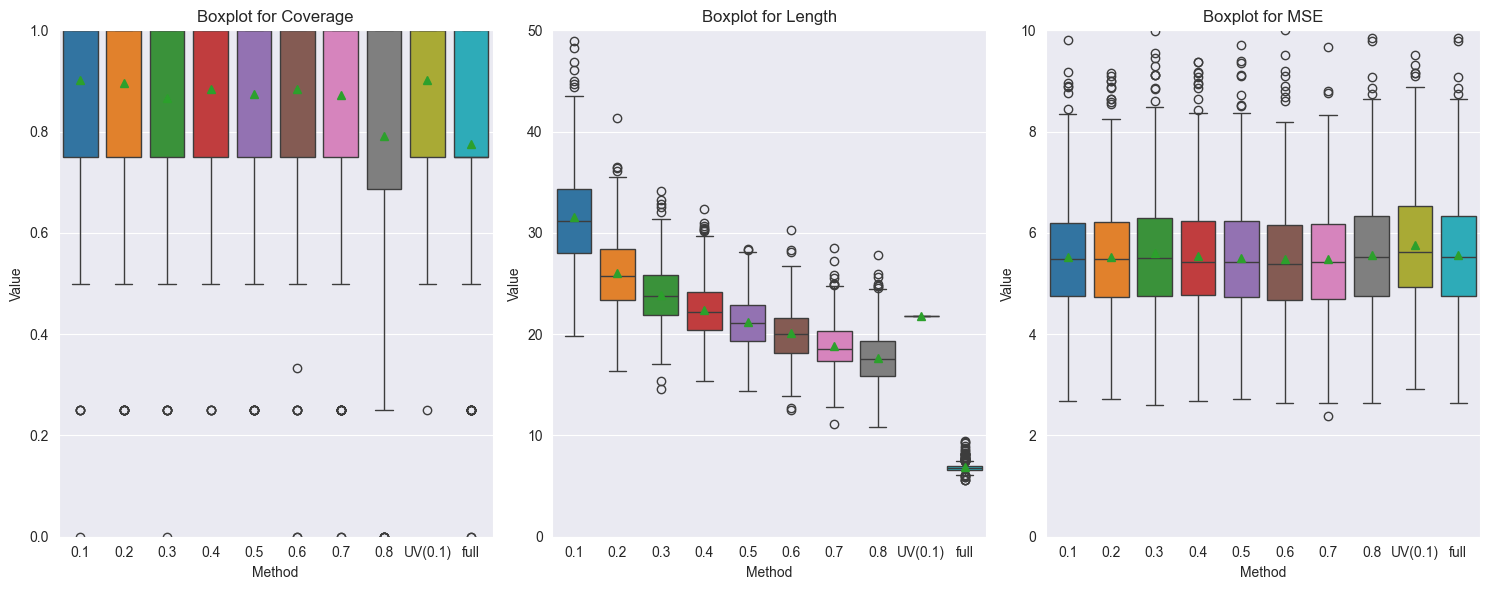

In [689]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)